# **Applied Natural Language Processing**
# **AT2**

## **HD Innovators**

1. Setting up the initial environment
2. Exploring the dataset
3. Data preparation
4. Analysing text using VADER sentiment analysis
5. Analysing text using Transformers RoBERTa model (~58M tweets)
6. Analysing text using the latest Transformers RoBERTa model (~124M tweets)

## **1. Setting up the initial environment**

In [258]:
import pandas as pd
import seaborn as sns
import nltk
import re
import spacy
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/mcyaputra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mcyaputra/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## **2. Exploring the dataset**

**2.1 Loading dataset**

In [259]:
#Loading dataset
df = pd.read_csv('https://raw.githubusercontent.com/EmmaNguyen99/ANLP_AT2_HDInnovators/main/Dataset%20with%202k%20each%20genre.csv')

In [260]:
#Showing the first 10 rows of the dataset
df.head(10)

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,valence
0,13923,santana,wham!,1978,blues,cold chamber smoke kush gettin higher plane sw...,198,0.857791
1,14958,marvin sease,show me what you got,1991,blues,public service announcement weezy baby best ra...,198,0.794930
2,15045,the robert cray band,1040 blues,1993,blues,gotta rapper today forget fuck smokin brain ce...,198,0.613561
3,15691,carl sims,it's just a party,2004,blues,girls knock ghetto ballin real thugs unngghhhh...,198,0.705276
4,16322,rufus thomas,sixty minute man,2011,blues,diddle devil yabba double walk feel body feel ...,198,0.651690
5,12619,the cadillacs,that's all i need,1957,blues,tell tell comin hell comin drink pour light st...,197,0.803174
6,12702,big maybelle,goin' home baby,1958,blues,door money kilt niggas round uhhhhh donkey pil...,197,0.748557
7,14099,aretha franklin,whatever it is,1980,blues,doubt life victory khaled cost will risk loss ...,197,0.221970
8,14346,al green,jesus is coming back (back again),1983,blues,tuck flow wine taste type flow high class hell...,197,0.637263
9,16540,mike zito,gone to texas,2013,blues,know dawg time remember things laugh dawg anju...,197,0.606348


In [262]:
#Showing total rows and columns in the dataset
df.shape

(11978, 8)

In [267]:
#Showing total values for each genre
df['genre'].value_counts()

blues      2000
country    2000
jazz       2000
pop        2000
rock       2000
reggae     1978
Name: genre, dtype: int64

In [268]:
#Displaying additional information including data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11978 entries, 0 to 11977
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    11978 non-null  int64  
 1   artist_name   11978 non-null  object 
 2   track_name    11978 non-null  object 
 3   release_date  11978 non-null  int64  
 4   genre         11978 non-null  object 
 5   lyrics        11978 non-null  object 
 6   len           11978 non-null  int64  
 7   valence       11978 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 748.8+ KB


In [269]:
df.describe()

,Unnamed: 0,release_date,len,valence
count,11978.000000,11978.000000,11978.000000,11978.000000
mean,16153.030473,1994.581232,106.949324,0.568380
std,7169.281975,17.132621,37.214055,0.245457
min,5.000000,1950.000000,56.000000,0.000000
25%,10682.500000,1982.000000,76.000000,0.375515
50%,17074.000000,1996.000000,98.000000,0.586768
75%,22211.750000,2010.000000,130.000000,0.767879
max,27467.000000,2019.000000,199.000000,1.000000


**2.2 Checking for missing values**

In [270]:
#Dropping missing values from the dataset
df['lyrics'].duplicated().sum()

0

**2.3 WordCloud**

<function matplotlib.pyplot.show(close=None, block=None)>

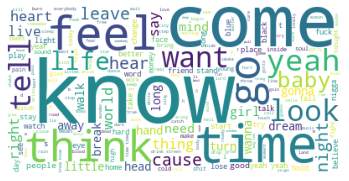

In [272]:
#Converting text to string
sentence_df = df['lyrics'].to_string()

#Showing most frequent words using word cloud
word_cloud = WordCloud(background_color = 'white').generate(sentence_df)
plt.imshow(word_cloud)
plt.axis('off')
plt.show

**2.4 Top 20 most frequent words**

In [273]:
#Import Counter library
from collections import Counter

#Calculating 10 most common words
Counter(" ".join(df["lyrics"]).split()).most_common(20)

[('like', 19887),
 ('know', 18872),
 ('time', 15167),
 ('come', 13897),
 ('yeah', 12222),
 ('feel', 9688),
 ('go', 9599),
 ('life', 9362),
 ('cause', 9207),
 ('away', 9002),
 ('want', 8243),
 ('right', 8118),
 ('baby', 8092),
 ('live', 7604),
 ('heart', 7460),
 ('night', 7007),
 ('tell', 6956),
 ('gonna', 6856),
 ('leave', 6691),
 ('good', 6668)]

Majority of the top 20 most frequent words are stop words, we will need to clean the text before further analysis can be done

## **3. Data Preparation**

**3.1 Converting text to lowercase**

In [274]:
#Defining a function to lowercase text
def lowercase(text):
  #Make text lowercase
  text = text.lower()
  return text

#Applying the lowercase function to the text
df['lyrics'] = df['lyrics'].apply(lowercase)

Texts are converted to lowercase to maintain consistency

**3.2 Removing punctuation**

In [275]:
#Defining a function to remove punctuation
def remove_punctuation(text):
  no_punctuation = str.maketrans('', '', string.punctuation)
  new_text = text.translate(no_punctuation)
  return new_text

#Applying punctuation removal function to the text
df['lyrics'] = df['lyrics'].apply(remove_punctuation)

This function removes punctuations from the text to reduce noise. Standardizing the format of the texts is crucial to make sure the analysis or model is being fed or trained on a consistent set of data

**3.3 Removing stopwords**

In [276]:
#Importing stopwords from nltk library
nltk.download('stopwords')

#Defining a function to remove stopwords
def remove_stop(text):

  #Splitting text
  new_text = text.split()
  stop_words = nltk.corpus.stopwords.words('english')

  #Looping through the text
  filtered_text = [word for word in new_text if not word in stop_words]

  #Rejoin text
  sentence_filtered = ' '.join(filtered_text)
  
  return sentence_filtered

#Applying stop words removal function
df['lyrics'] = df['lyrics'].apply(remove_stop)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mcyaputra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Some common stop words include 'a', 'and' and 'the'. Removing these words can help reduce the size and dimensionality and improve overall efficiency of machine learning models.

**3.4 Tokenize and lemmatize text**

In [277]:
#Importing relevant library
from nltk.stem import WordNetLemmatizer

#Assigning a function for easier recall
lemmatizer = WordNetLemmatizer()

#Defining a function to perform lemmatization
def lemmatize(text):

  #Tokening words
  words = nltk.word_tokenize(text)

  #Performing lemmatization
  lemma_words = [lemmatizer.lemmatize(word) for word in words]

  #Rejoining the text
  lemma_text = ' '.join(lemma_words)

  return lemma_text

#Applying lemmatization function to the text
df['lyrics'] = df['lyrics'].apply(lemmatize)

In [278]:
df

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,valence
0,13923,santana,wham!,1978,blues,cold chamber smoke kush gettin higher plane sw...,198,0.857791
1,14958,marvin sease,show me what you got,1991,blues,public service announcement weezy baby best ra...,198,0.794930
2,15045,the robert cray band,1040 blues,1993,blues,got ta rapper today forget fuck smokin brain c...,198,0.613561
3,15691,carl sims,it's just a party,2004,blues,girl knock ghetto ballin real thug unngghhhhhh...,198,0.705276
4,16322,rufus thomas,sixty minute man,2011,blues,diddle devil yabba double walk feel body feel ...,198,0.651690
...,...,...,...,...,...,...,...,...
11973,26756,newsboys,your love never fails,2011,rock,ohhh separate away fail know mistake cause fai...,61,0.550701
11974,26866,mumford & sons,where are you now,2012,rock,come hear walk city street say word finally ey...,61,0.101401
11975,26875,snow patrol,just say yes,2013,rock,run way want stay okay pretend tell today hand...,61,0.236397
11976,27024,starset,carnivore,2014,rock,life know inside beast grow wait chew rope cha...,61,0.025556


We can further improve the accuracy of the analysis using lemmatization technique. This process reduces words to their root or base form called lemma. This is a common technique used in sentiment analysis to normalize words and reduce variations

**3.5 Assigning sentiment tag (positive/negative/neutral) to the dataset**

In [349]:
value1 = 1/3
value2 = 2/3

def sentiment_value(valence):
    if valence >= value2:
        return 'Positive'
    elif valence <= value1:
        return 'Negative'
    else: 
        return 'Neutral'
    
df['valence_sentiment'] = df['valence'].apply(sentiment_value)
df

,roberta_neg,roberta_neu,roberta_pos,roberta_latest_neg,roberta_latest_neu,roberta_latest_pos,vader_neg,vader_neu,vader_pos,vader_compound,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,valence,vader_sentiment,valence_sentiment
0,0.220962,0.683247,0.095791,0.030405,0.657197,0.312398,0.087,0.756,0.158,0.9153,13923,santana,wham!,1978,blues,cold chamber smoke kush gettin higher plane sw...,198,0.857791,Positive,Positive
1,0.096997,0.766427,0.136576,0.031855,0.404066,0.564079,0.122,0.516,0.362,0.9963,14958,marvin sease,show me what you got,1991,blues,public service announcement weezy baby best ra...,198,0.794930,Positive,Positive
2,0.386505,0.557754,0.055742,0.231962,0.642463,0.125575,0.103,0.668,0.229,0.9723,15045,the robert cray band,1040 blues,1993,blues,got ta rapper today forget fuck smokin brain c...,198,0.613561,Positive,Neutral
3,0.451228,0.507474,0.041298,0.530861,0.396479,0.072660,0.191,0.727,0.082,-0.9838,15691,carl sims,it's just a party,2004,blues,girl knock ghetto ballin real thug unngghhhhhh...,198,0.705276,Negative,Positive
4,0.116273,0.841189,0.042538,0.054678,0.764214,0.181107,0.058,0.891,0.051,-0.3612,16322,rufus thomas,sixty minute man,2011,blues,diddle devil yabba double walk feel body feel ...,198,0.651690,Neutral,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11973,0.683536,0.291190,0.025273,0.742722,0.230746,0.026532,0.500,0.411,0.089,-0.9922,26756,newsboys,your love never fails,2011,rock,ohhh separate away fail know mistake cause fai...,61,0.550701,Negative,Neutral
11974,0.288800,0.614660,0.096540,0.229094,0.719133,0.051774,0.276,0.559,0.165,-0.8074,26866,mumford & sons,where are you now,2012,rock,come hear walk city street say word finally ey...,61,0.101401,Negative,Negative
11975,0.071747,0.724487,0.203767,0.018533,0.684240,0.297227,0.082,0.366,0.552,0.9896,26875,snow patrol,just say yes,2013,rock,run way want stay okay pretend tell today hand...,61,0.236397,Positive,Negative
11976,0.286323,0.654840,0.058837,0.159167,0.693238,0.147595,0.027,0.874,0.100,0.4019,27024,starset,carnivore,2014,rock,life know inside beast grow wait chew rope cha...,61,0.025556,Positive,Negative


## **4. Analysing text using VADER sentiment analysis**

**4.1 Importing VADER sentiment analyzer**

In [279]:
!pip install vaderSentiment

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [319]:
#Importing relevant library
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

#Assigning SentimentIntensityAnalyzer to a function called analyzer
vader_analyzer = SentimentIntensityAnalyzer()

**4.2 Performing sentiment analysis using VADER**

In [282]:
#Creating an empty dictionary
vader_sentiment = {}

#Iterrating rows
for index, row in df.iterrows():
    text = row['lyrics']
    Id = index

    #Analysing text and saving the result in the empty dictionary created earlier
    vader_sentiment[Id] = vader_analyzer.polarity_scores(text)

**4.3 Merging analysis result with the original dataset**

In [283]:
#Converting result dictionary to a pandas dataframe
vader_sentiment = pd.DataFrame(vader_sentiment).T

#Merging both dataset (vader sentiment result + original dataset)
vader_sentiment = pd.concat([vader_sentiment, df], axis=1)

#Renaming columns to indicate sentiment result using VADER
df = vader_sentiment.rename(columns={'neg': 'vader_neg', 'neu': 'vader_neu', 'pos': 'vader_pos', 'compound': 'vader_compound'})

**4.4 Assigning sentiment rating for every user expression**

In [284]:
#Assigning rating values to functions
float_value1 = 0.4
float_value2 = -0.4
    
#Assigning function to organize sentiment ratings based on analysis result
def vader_analysis(text):
    if text >= float_value1:
        return 'Positive'
    elif text <= float_value2:
        return 'Negative'
    else:
        return 'Neutral'
    
#Applying sentiment ratings to the analysis result  
df['vader_sentiment'] = df['vader_compound'].apply(vader_analysis)
df

,vader_neg,vader_neu,vader_pos,vader_compound,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,valence,vader_sentiment
0,0.087,0.756,0.158,0.9153,13923,santana,wham!,1978,blues,cold chamber smoke kush gettin higher plane sw...,198,0.857791,Positive
1,0.122,0.516,0.362,0.9963,14958,marvin sease,show me what you got,1991,blues,public service announcement weezy baby best ra...,198,0.794930,Positive
2,0.103,0.668,0.229,0.9723,15045,the robert cray band,1040 blues,1993,blues,got ta rapper today forget fuck smokin brain c...,198,0.613561,Positive
3,0.191,0.727,0.082,-0.9838,15691,carl sims,it's just a party,2004,blues,girl knock ghetto ballin real thug unngghhhhhh...,198,0.705276,Negative
4,0.058,0.891,0.051,-0.3612,16322,rufus thomas,sixty minute man,2011,blues,diddle devil yabba double walk feel body feel ...,198,0.651690,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11973,0.500,0.411,0.089,-0.9922,26756,newsboys,your love never fails,2011,rock,ohhh separate away fail know mistake cause fai...,61,0.550701,Negative
11974,0.276,0.559,0.165,-0.8074,26866,mumford & sons,where are you now,2012,rock,come hear walk city street say word finally ey...,61,0.101401,Negative
11975,0.082,0.366,0.552,0.9896,26875,snow patrol,just say yes,2013,rock,run way want stay okay pretend tell today hand...,61,0.236397,Positive
11976,0.027,0.874,0.100,0.4019,27024,starset,carnivore,2014,rock,life know inside beast grow wait chew rope cha...,61,0.025556,Positive


**4.5 Distribution of sentiment rating**

Text(0.5, 1.0, 'Sentiment Distribution')

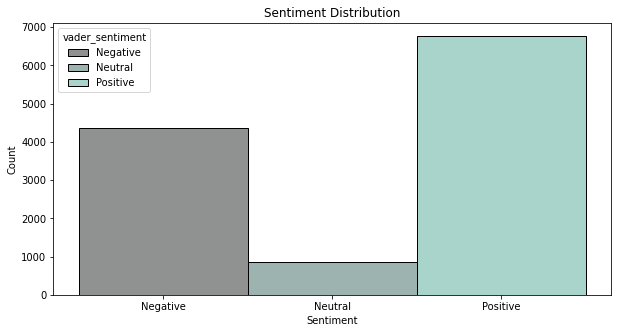

In [288]:
df['vader_sentiment'] = pd.Categorical(df['vader_sentiment'], ['Negative','Neutral','Positive'])

plt.figure(figsize=(10,5))
sns.histplot(data=df, x='vader_sentiment', palette='dark:#5A9', hue='vader_sentiment')
plt.xlabel(xlabel='Sentiment')
plt.title(label='Sentiment Distribution')

**4.6 Top 20 most frequent words**

Text(0.5, 1.0, 'Top 20 most frequent words')

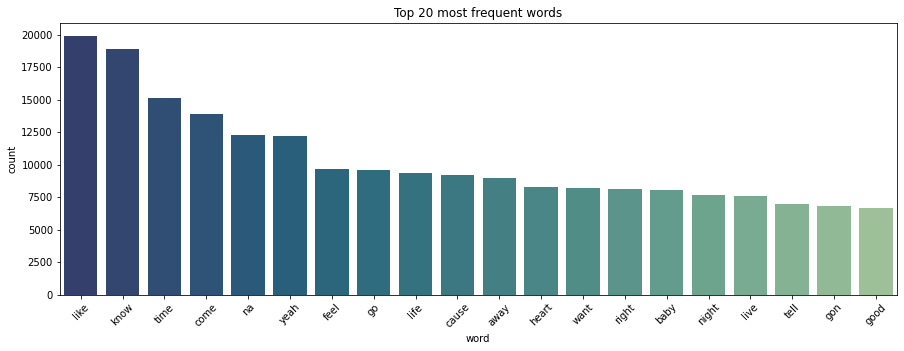

In [289]:
#Importing relevant library
from collections import Counter

#Calculating 20 most common words
word_count = Counter(" ".join(df["lyrics"]).split()).most_common(20)

word_count = pd.DataFrame(word_count, columns=['word', 'count'])

#Visualizing using seaborn barplot
plt.figure(figsize=(15,5))
sns.barplot(data=word_count, x='word', y='count', palette='crest_r')
plt.xticks(rotation=45)
plt.title(label= 'Top 20 most frequent words')

**4.7 Correlation between sentiment ratings and sentiment scores**

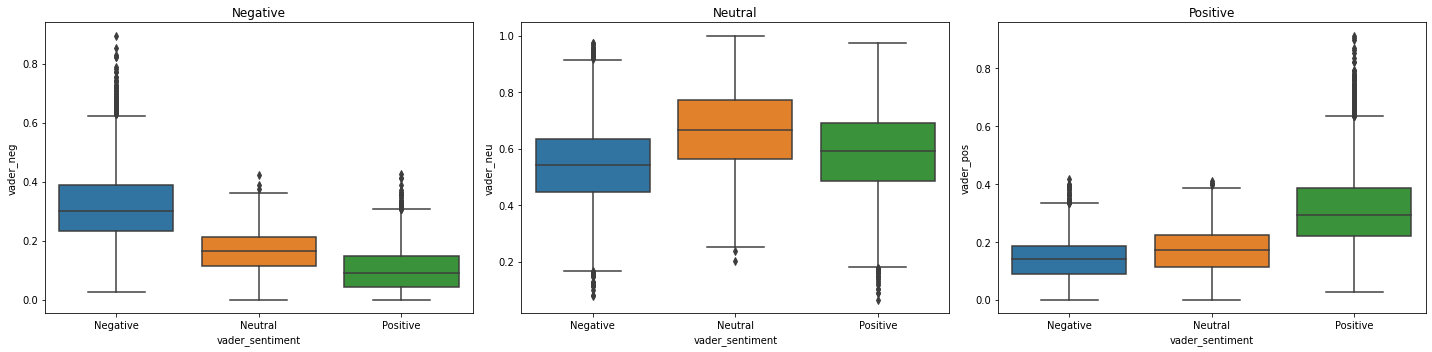

In [290]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
sns.boxplot(x='vader_sentiment', y='vader_neg', data=df, ax=axs[0])
sns.boxplot(x='vader_sentiment', y='vader_neu', data=df, ax=axs[1])
sns.boxplot(x='vader_sentiment', y='vader_pos', data=df, ax=axs[2])
axs[0].set_title('Negative')
axs[1].set_title('Neutral')
axs[2].set_title('Positive')
plt.tight_layout()
plt.show()

## **5. Analysing text using Transformers RoBERTa model (~58M tweets)**

**5.1 Installing and Importing Transformers library**

In [300]:
!pip install torch torchvision

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [301]:
!pip install transformers

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [302]:
#PyTorch is needed to run Transformers, run below code if you don't have PyTorch installed
# !pip install torch torchvision

#Importing functions from transformers library
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

**5.2 Pulling pre-trained RoBERTa model and assign it to a function**

In [303]:
#Pulling trained model (RoBERTa) and assigning it to a function
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

**5.3 Performing sentiment analysis using RoBERTa**

In [310]:
#Defining function to initiate RoBERTa and perform sentiment analysis
def roberta_scores(text):
    encoded_text = tokenizer(text, max_length= 511, return_tensors='pt')
    output = model(**encoded_text)
    score = output[0][0].detach().numpy()
    score = softmax(score)
    score_dict = {
        'roberta_neg': score[0],
        'roberta_neu': score[1],
        'roberta_pos': score[2]
    }
    return score_dict

In [320]:
#Creating empty dictionary
roberta_result = {}

#Iterrating rows
for index, row in tqdm(df.iterrows(), total=len(df)):
    text = row['lyrics']
    Id = index

    #Analysing text and saving the result in the empty dictionary created earlier
    roberta_result[Id] = roberta_scores(text)


  0%|          | 0/11978 [00:00<?, ?it/s]

**5.4 Merging analysis result with the original dataset**

In [321]:
#Converting result dictionary to a pandas dataframe
roberta_result = pd.DataFrame(roberta_result).T

#Merging both dataset (roberta sentiment result + original dataset)
df = pd.concat([roberta_result, df], axis=1)


In [322]:
df

,roberta_neg,roberta_neu,roberta_pos,roberta_latest_neg,roberta_latest_neu,roberta_latest_pos,vader_neg,vader_neu,vader_pos,vader_compound,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,valence,vader_sentiment
0,0.220962,0.683247,0.095791,0.030405,0.657197,0.312398,0.087,0.756,0.158,0.9153,13923,santana,wham!,1978,blues,cold chamber smoke kush gettin higher plane sw...,198,0.857791,Positive
1,0.096997,0.766427,0.136576,0.031855,0.404066,0.564079,0.122,0.516,0.362,0.9963,14958,marvin sease,show me what you got,1991,blues,public service announcement weezy baby best ra...,198,0.794930,Positive
2,0.386505,0.557754,0.055742,0.231962,0.642463,0.125575,0.103,0.668,0.229,0.9723,15045,the robert cray band,1040 blues,1993,blues,got ta rapper today forget fuck smokin brain c...,198,0.613561,Positive
3,0.451228,0.507474,0.041298,0.530861,0.396479,0.072660,0.191,0.727,0.082,-0.9838,15691,carl sims,it's just a party,2004,blues,girl knock ghetto ballin real thug unngghhhhhh...,198,0.705276,Negative
4,0.116273,0.841189,0.042538,0.054678,0.764214,0.181107,0.058,0.891,0.051,-0.3612,16322,rufus thomas,sixty minute man,2011,blues,diddle devil yabba double walk feel body feel ...,198,0.651690,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11973,0.683536,0.291190,0.025273,0.742722,0.230746,0.026532,0.500,0.411,0.089,-0.9922,26756,newsboys,your love never fails,2011,rock,ohhh separate away fail know mistake cause fai...,61,0.550701,Negative
11974,0.288800,0.614660,0.096540,0.229094,0.719133,0.051774,0.276,0.559,0.165,-0.8074,26866,mumford & sons,where are you now,2012,rock,come hear walk city street say word finally ey...,61,0.101401,Negative
11975,0.071747,0.724487,0.203767,0.018533,0.684240,0.297227,0.082,0.366,0.552,0.9896,26875,snow patrol,just say yes,2013,rock,run way want stay okay pretend tell today hand...,61,0.236397,Positive
11976,0.286323,0.654840,0.058837,0.159167,0.693238,0.147595,0.027,0.874,0.100,0.4019,27024,starset,carnivore,2014,rock,life know inside beast grow wait chew rope cha...,61,0.025556,Positive


In [344]:
roberta_sentiment = []

for index, row in df[['roberta_neg', 'roberta_neu', 'roberta_pos']].iterrows():
    max_value = max(row)
    roberta_sentiment.append({'score': max_value})

In [345]:
roberta_sentiment = pd.DataFrame(roberta_sentiment)
roberta_sentiment

,score
0,0.683247
1,0.766427
2,0.557754
3,0.507474
4,0.841189
...,...
11973,0.683536
11974,0.614660
11975,0.724487
11976,0.654840


In [346]:
roberta_sentiment_max = []

for index, row in df[['roberta_neg', 'roberta_neu', 'roberta_pos']].iterrows():
    max_value = row.idxmax()
    roberta_sentiment_max.append({'score': max_value})

    

In [347]:
roberta_sentiment_max = pd.DataFrame(roberta_sentiment_max)
roberta_sentiment_max

,score
0,roberta_neu
1,roberta_neu
2,roberta_neu
3,roberta_neu
4,roberta_neu
...,...
11973,roberta_neg
11974,roberta_neu
11975,roberta_neu
11976,roberta_neu


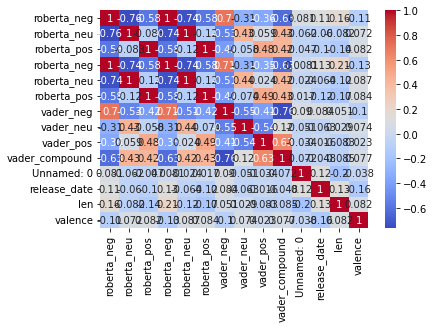

In [49]:
ax = sns.heatmap(df.corr(), annot =True, fmt='.2g', cmap = 'coolwarm')
plt.show()

## **6. Analysing text using the latest Transformers RoBERTa model (~124M tweets)**

In [293]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax

In [294]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Downloading:   0%|          | 0.00/929 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [296]:
def roberta_latest_scores(text):
    encoded_text = tokenizer(text, max_length= 511, return_tensors='pt')
    output = model(**encoded_text)
    score = output[0][0].detach().numpy()
    score = softmax(score)
    score_dict = {
        'roberta_latest_neg': score[0],
        'roberta_latest_neu': score[1],
        'roberta_latest_pos': score[2]
    }
    return score_dict

In [297]:
#Creating empty dictionary
roberta_latest_result = {}

#Iterrating rows
for index, row in tqdm(df.iterrows(), total=len(df)):
    text = row['lyrics']
    Id = index

    #Analysing text and saving the result in the empty dictionary created earlier
    roberta_latest_result[Id] = roberta_latest_scores(text)


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [298]:
#Converting result dictionary to a pandas dataframe
roberta_latest_result = pd.DataFrame(roberta_latest_result).T

#Merging both dataset (roberta sentiment result + original dataset)
df = pd.concat([roberta_latest_result, df], axis=1)


In [299]:
df

,roberta_latest_neg,roberta_latest_neu,roberta_latest_pos,vader_neg,vader_neu,vader_pos,vader_compound,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,valence,vader_sentiment
0,0.030405,0.657197,0.312398,0.087,0.756,0.158,0.9153,13923,santana,wham!,1978,blues,cold chamber smoke kush gettin higher plane sw...,198,0.857791,Positive
1,0.031855,0.404066,0.564079,0.122,0.516,0.362,0.9963,14958,marvin sease,show me what you got,1991,blues,public service announcement weezy baby best ra...,198,0.794930,Positive
2,0.231962,0.642463,0.125575,0.103,0.668,0.229,0.9723,15045,the robert cray band,1040 blues,1993,blues,got ta rapper today forget fuck smokin brain c...,198,0.613561,Positive
3,0.530861,0.396479,0.072660,0.191,0.727,0.082,-0.9838,15691,carl sims,it's just a party,2004,blues,girl knock ghetto ballin real thug unngghhhhhh...,198,0.705276,Negative
4,0.054678,0.764214,0.181107,0.058,0.891,0.051,-0.3612,16322,rufus thomas,sixty minute man,2011,blues,diddle devil yabba double walk feel body feel ...,198,0.651690,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11973,0.742722,0.230746,0.026532,0.500,0.411,0.089,-0.9922,26756,newsboys,your love never fails,2011,rock,ohhh separate away fail know mistake cause fai...,61,0.550701,Negative
11974,0.229094,0.719133,0.051774,0.276,0.559,0.165,-0.8074,26866,mumford & sons,where are you now,2012,rock,come hear walk city street say word finally ey...,61,0.101401,Negative
11975,0.018533,0.684240,0.297227,0.082,0.366,0.552,0.9896,26875,snow patrol,just say yes,2013,rock,run way want stay okay pretend tell today hand...,61,0.236397,Positive
11976,0.159167,0.693238,0.147595,0.027,0.874,0.100,0.4019,27024,starset,carnivore,2014,rock,life know inside beast grow wait chew rope cha...,61,0.025556,Positive


In [ ]:
# Use visualization to explore the result of the sentiment analysis and performance metric
# 